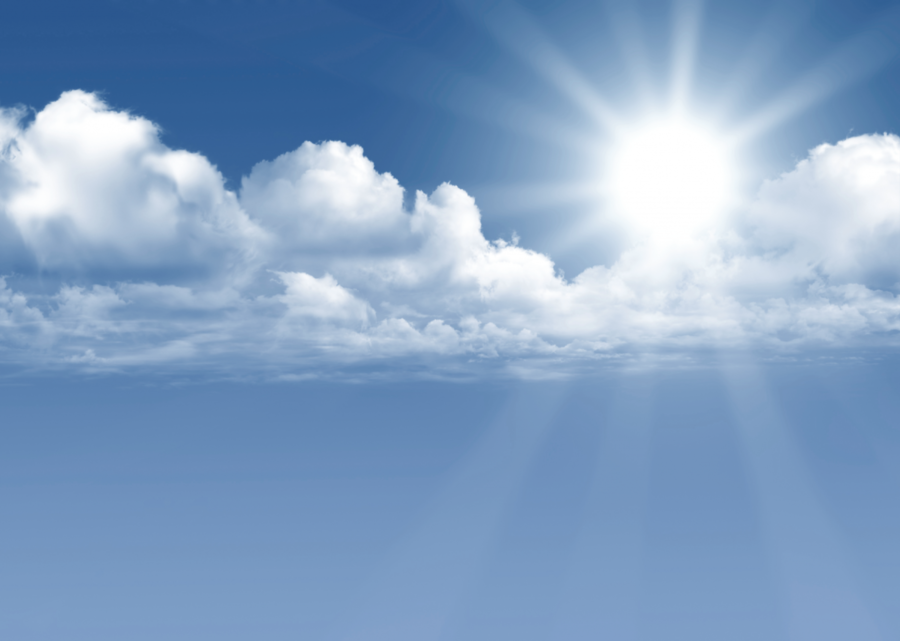

In [3]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

foreImg = cv2.imread('foreground.jpg')
foreMask = cv2.imread('foreground.png', cv2.IMREAD_GRAYSCALE)
backImg = cv2.imread('back9.png')

#I printed the background
cv2_imshow(backImg)

In [4]:

#for this funciton, I took 4 parameters. 3 is for getting images and topLeft is for combining where those images
def combineForegroundBackground(foreImg, foreMask, backImg, topLeft):
    # starting by setting dimensions of the images
    bgH, bgW = backImg.shape[:2]
    fgH, fgW = foreImg.shape[:2]

    # position of the top-left corner of images
    fgTop, fgLeft = topLeft
    fgBottom = fgTop + fgH
    fgRight = fgLeft + fgW
    outputImg = backImg.copy()

    # Loop for foreground mask
    for y in range(fgH):
        for x in range(fgW):
            # If the pixel belongs to the foreground object
            if foreMask[y,x] > 0:
                bgY = fgTop + y
                bgX = fgLeft + x
                if bgX >= 0 and bgX < bgW  and bgY < bgH and bgY >= 0 :
                    outputImg[bgY,bgX] = foreImg[y,x]

    return outputImg




In [5]:

# Defined top-left corner
topLeft= (250,200)
topRight= (502, 202)
topL = (500, 640)


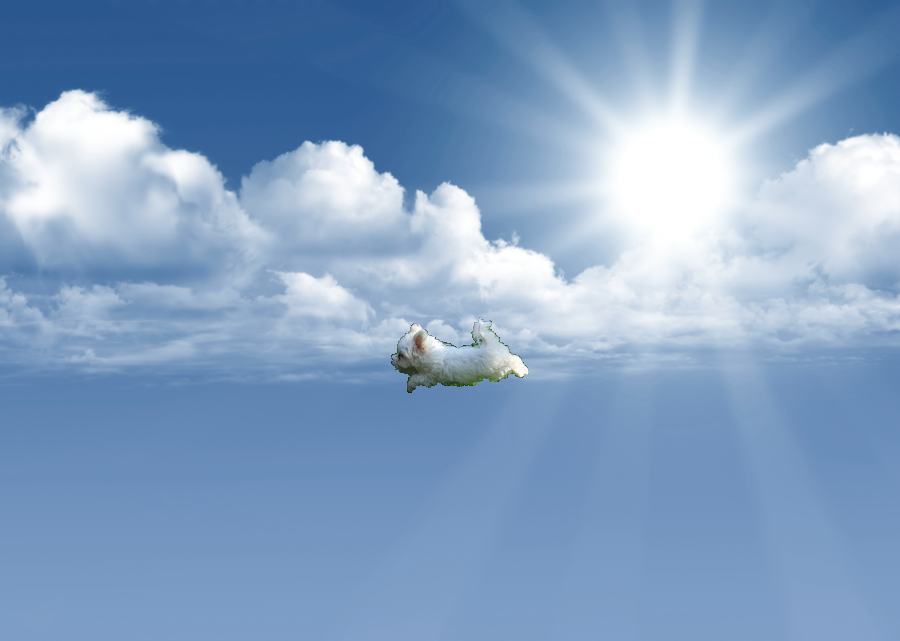

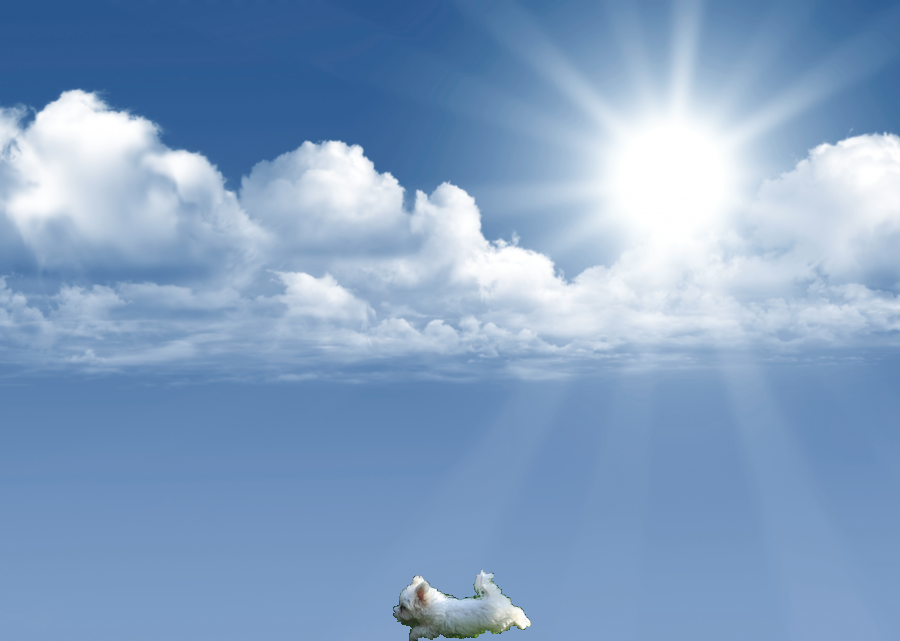

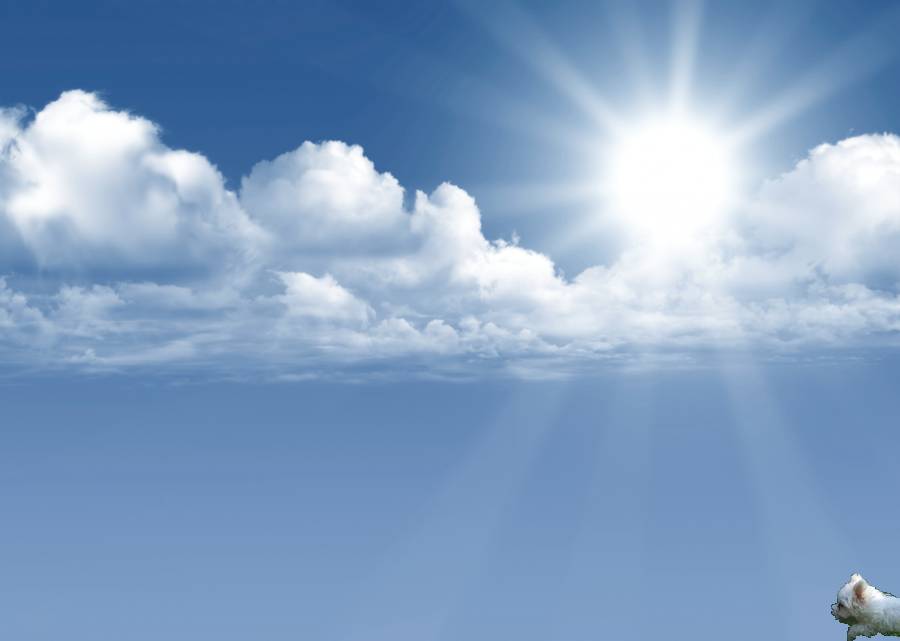

In [7]:
#printing the images
combinedImg = combineForegroundBackground(foreImg, foreMask, backImg, topLeft)
cv2_imshow( combinedImg)

combinedImg = combineForegroundBackground(foreImg, foreMask, backImg, topRight)
cv2_imshow( combinedImg)

resultImg = combineForegroundBackground(foreImg, foreMask, backImg, topL)
cv2_imshow(resultImg)
